In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Initial Setting (font, display)
!sudo apt-get install -y fonts-nanum # 글씨체 다운로드
!sudo fc-cache -fv # 폰트 리스트 갱신
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import matplotlib
get_ipython().run_line_magic('config', "InlineBackend.figure_format='retina'") # 화질 보정

import os
import re
import pandas as pd
import numpy as np
import seaborn as sns

# NLP packages
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize
print('Ready')

fc-cache: succeeded
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Ready


In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 4.7 MB/s 
     |████████████████████████████████| 453 kB 70.4 MB/s 


In [ ]:
from konlpy.tag import Okt, Komoran, Hannanum, Kkma

def get_tokenizer(tokenizer_name):
    if tokenizer_name == "komoran":
        tokenizer = Komoran()
    elif tokenizer_name == "okt":
        tokenizer = Okt()
    elif tokenizer_name == "kkma":
        tokenizer = Kkma()
    return tokenizer

In [ ]:
from wordcloud import WordCloud

# 토크나이징된 data frame 넣으면 워드클라우드 그려주는 함수 정의
def wcdraw(df, color):  
  df2 = tokenizing(df)
  fontpath = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'
  wordcloud = WordCloud(font_path = fontpath, max_words=100, colormap = color,
                      width=900,height=500, background_color ='white')
  wordcloud = wordcloud.generate_from_frequencies(df2) # 빈도에 따라서 워드클라우드 시각화
  plt.figure(figsize = (15 , 10))
  plt.axis("off")
  plt.imshow(wordcloud)

### 1. 카테고리별 워드클라우드

In [ ]:
news_df = pd.read_excel('/content/drive/MyDrive/22 SUM/(KUBIG) 고대신문 프로젝트/(최종) 뉴스 신문기사.xlsx')
del news_df['Unnamed: 0']
news_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  """Entry point for launching an IPython kernel.


,keyword,press,reporter,title,content,date,url,content_preprocess,content_tokenize
0,조국,중앙일보,나운채,"정경심 유죄에 ""아직 판결문 읽나""…고대생들 분노 넘어 자조",“이젠 정진택 총장도 답변하실 때가 됐습니다” 서울 성북구 고려대학교 본관에 고려...,2022-01-28,https://www.joongang.co.kr/article/25044471,이 젠 정진택 총장도 답변 하실 때가 됐습니다 서울 성북구 고려대학교 본관에 고려대...,"['이', '젠', '정진', '택', '총장', '도', '답변', '하실', '..."
1,조국,조선일보,김형원,조민 ‘고려대 입학취소’…정치권 설전으로 옮겨 붙었다,여야(與野)핵심의원들이 조국 전 법무부장관의 딸 조민씨의 고려대 입학취소 문제와 관...,2021-08-27,https://www.chosun.com/politics/assembly/2021/...,여야 핵심 의원들이 조국 전 법무부 장관의 딸 조민씨의 고려대 입학 취소 문제와 관...,"['여야', '핵심', '의원', '들', '이', '조국', '전', '법무부',..."
2,조국,세계일보,정은나리,‘조민 입학 취소’ 논란 확산… 반대 청원 20만 돌파 VS ‘고려대→조려대’ 풍자,"부산대 민주동문회 “입학취소 성급, 즉각 철회하라” 고려대 커뮤니티선 “총장이 권력...",2021-08-26,http://www.segye.com/content/html/2021/08/26/2...,부산대 민주동문회 입학취소 성급 즉각 철회하라 고려대 커뮤니티 선 총장이 권력 눈치...,"['부산', '대', '민주', '동문회', '입학', '취소', '성', '급',..."
3,조국,서울경제,박신원,"""조려대"" ""민족고대 아닌 Min Cho고대""…고대생들의 분노",고려대학교 로고(왼쪽)에 조국 전 법무부 장관 딸 조민씨로 추정되는 여성(오른쪽...,2021-08-26,http://www.sedaily.com/NewsView/22QC76NBP5,고려대학교 로고 왼쪽 에 조국 전 법무부 장관 딸 조민씨로 추정되는 여성 오른쪽 의...,"['고려대학교', '로고', '왼쪽', '에', '조국', '전', '법무부', '..."
4,조국,머니투데이,박효주,"고려대 아닌 '조려대'…고대생의 분노, 조민 얼굴 합성해 조롱",고려대학교 로고(왼쪽)에 조국 전 법무부 장관 딸 조민씨 얼굴을 합성한 로고. /사...,2021-08-26,http://news.moneytoday.co.kr/view/mtview.php?n...,고려대학교 로고 왼쪽 에 조국 전 법무부 장관 딸 조민씨 얼굴을 합성한 로고 사진 ...,"['고려대학교', '로고', '왼쪽', '에', '조국', '전', '법무부', '..."


In [ ]:
len(news_df)

251

In [ ]:
news_1 = news_df[news_df['keyword'] == '조국']
news_2 = news_df[news_df['keyword'] == '세종캠퍼스']
news_3 = news_df[news_df['keyword'] == '박성민']
print('조국 관련 :', len(news_1),
      '세종캠 관련 :', len(news_2),
      '박성민 관련 :', len(news_3))

조국 관련 : 209 세종캠 관련 : 17 박성민 관련 : 25


In [ ]:
# konlpy로 명사만 추출하는 토큰화를 진행
stopwords = ['않다','에서','있다','없다','그렇다','아니다','것','이다','의','가','이','은','들', '주',
             '는','좀','잘','걍','과','도','을','를','으로','자','에','와','한','하다','휴','수' ,'일',
             '전','등','두','명','고','며','아아','대해','고려대','씨','뿐','박','감','살','관',
             '조','장관','조국','후보자','회','때','캠','세종','세종캠','캠퍼스','학생','대한','박성민',
             '비서','비서관','청년','그','청와대']

okt = Okt()
token = []
for sentence in news_2['content_preprocess']:
    temp_X = []
    temp_X = okt.nouns(sentence) # 명사 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    token.append(temp_X)
news_2['token'] = token
tokenizer = Tokenizer()
tokenizer.fit_on_texts(token)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [ ]:
from collections import Counter 

# 단어 빈도 수 세어서 가장 빈도 높은 100개만 추출하는 함수 정의
def tokenizing(df):
    words = np.hstack(news_2['token'].values)
    word_count = Counter(words)
    input = dict(word_count.most_common(100))
    return input

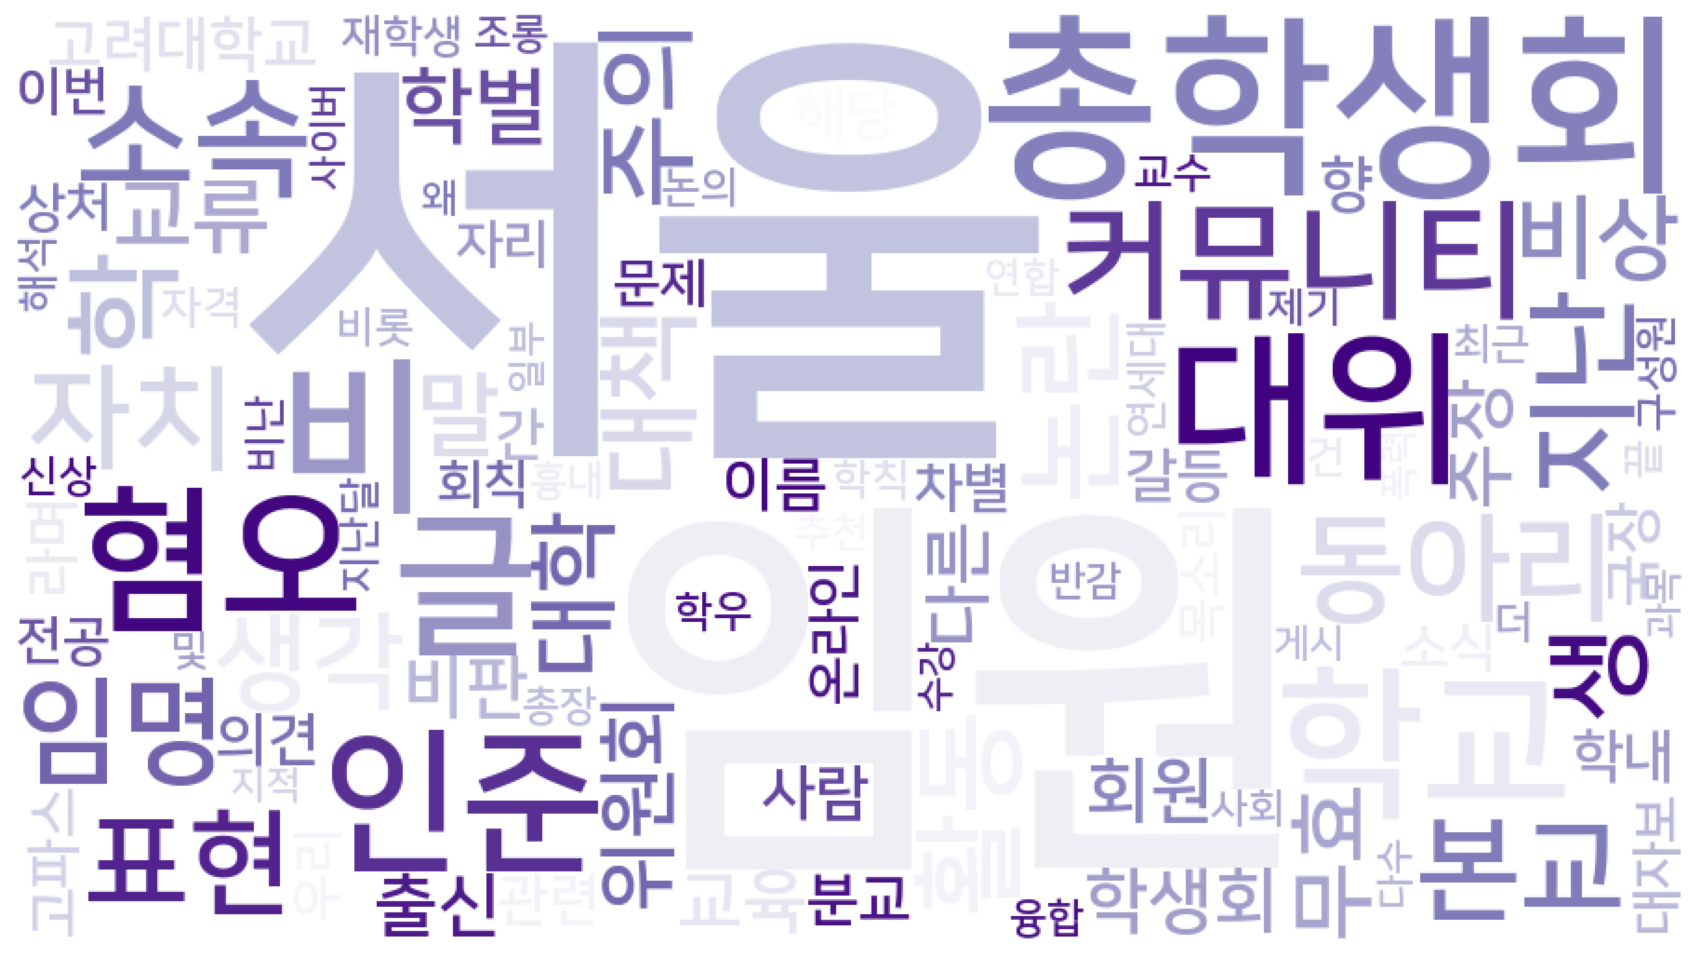

In [ ]:
wcdraw(news_2, 'Purples')

In [ ]:
kor_df = pd.read_excel('/content/drive/MyDrive/22 SUM/(KUBIG) 고대신문 프로젝트/(최종) 고려대학교 온라인 커뮤니티.xlsx')
del kor_df['Unnamed: 0']
kor_df.head()

,keyword,title,content,likes,date,comment,comment_likes,comment_num,content_preprocess,comment_preprocess,content_tokenize,comment_tokenize
0,조국,"""조국 땐 촛불, 교수 비리엔 입닫는 고대생""..총학 '성명 발표'",물어뜯기 바쁘네요 진짜 귀막고 얘기하는거 같음,55.0,2020-09-28,"*대깨문들의 이중논리 1. 박근혜 최순실에는 분노하면서, 추미애, 조국, 윤미향, ...",106.0,1.0,물어뜯기 바쁘네요 진짜 귀 막고 얘기하는 거 같음,대깨문들의 이 중 논리 1 박근혜 최순실에는 분 노하면서 추미애 조국 윤 미향 안민...,"['물어', '뜯기', '바쁘네요', '진짜', '귀', '막고', '얘기', '하...","['대', '깨문', '들', '의', '이', '중', '논리', '1', '박근..."
1,조국,"[속보]법원 ""조국 딸, 단국대 1저자 논문 기여 안했다""",이번에는 고려대가 반응할까요?,116.0,2020-12-23,이러고는 형이 확정된건 아니니 최종심까지는 지켜봐야한다 하면 졸업햇으니 자퇴는 안되...,111.0,1.0,이번에는 고려대가 반응할까요,이러고는 형이 확정된 건 아니니 최종심까지는 지켜봐야 한다 하면 졸업 햇으니 자퇴는...,"['이번', '에는', '고려대', '가', '반응', '할까', '요']","['이러고는', '형', '이', '확정', '된', '건', '아니니', '최종'..."
2,조국,조국장관 딸 표창장 위조 인정되었네요. 이제 학교당국의 후속조치 기대하겠습니다.,근데 아마 학교당국은 눈치보느라 아무것도 안하겠죠?,854.0,2020-12-23,이런건 고려대학교가 직접 나서서 먼저 제재 했어야 했는데 실망스럽습니다.\n판결을 ...,1550.0,3.0,근데 아마 학교 당국은 눈치 보느라 아무것도 안하겠죠,이런 건 고려대학교가 직접 나서서 먼저 제재 했어야 했는데 실망스럽습니다 판결을 떠...,"['근데', '아마', '학교', '당국', '은', '눈치', '보느라', '아무...","['이런', '건', '고려대학교', '가', '직접', '나서서', '먼저', '..."
3,조국,고려대학교는 죽었다.,1. 고려대 2010학년도 수시모집 요강의 수험생 공통 유의사항 : '서류 위조·변...,936.0,2020-12-30,권력의 개들이죠,415.0,1.0,1 고려대 2010학년도 수시 모집 요강의 수험생 공통 유의사항 서류 위조 변조 및...,권력의 개들이죠,"['1', '고려대', '2010', '학년', '도', '수시', '모집', '요...","['권력', '의', '개', '들이죠']"
4,조국,"고대 총장 및 교직원들, 뭐하고 있나요?","전 나라를 뒤흔든 2017년, 정유라 사태에선 학생들의 집단 요구로 이대 교직원 ...",446.0,2021-01-17,쪽팔려요 진심,150.0,1.0,전 나라를 뒤흔든 2017년 정유라 사태에선 학생들의 집단 요구로 이 대 교직원 및...,쪽팔려 요 진심,"['전', '나라', '를', '뒤', '흔든', '2017년', '정유', '라'...","['쪽팔려', '요', '진심']"


In [ ]:
len(kor_df)

109

In [ ]:
kor_1 = kor_df[kor_df['keyword'] == '조국']
kor_2 = kor_df[kor_df['keyword'] == '세종']
kor_3 = kor_df[kor_df['keyword'] == '박성민']
print('조국 관련 :', len(kor_1),
      '세종캠 관련 :', len(kor_2),
      '박성민 관련 :', len(kor_3))

조국 관련 : 30 세종캠 관련 : 39 박성민 관련 : 40


In [ ]:
# konlpy로 명사만 추출하는 토큰화를 진행
stopwords = ['않다','에서','있다','없다','그렇다','아니다','것','이다','의','가','이','은','들', '주',
             '는','좀','잘','걍','과','도','을','를','으로','자','에','와','한','하다','휴','수' ,'일',
             '전','등','두','명','고','며','아아','대해','고려대','씨','뿐','박','감','살','관','그','내','의'
             ,'거','요''조','장관','조국','후보자','회','때','캠','세종','세종캠','캠퍼스','학생','대한','박성민',
             '비서','비서관','청년','그','청와대','사람','당신','게','시','세','건','글','분','서울','요']

okt = Okt()
token = []
for sentence in kor_2['content_preprocess']:
    temp_X = []
    temp_X = okt.nouns(str(sentence)) # 명사 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    token.append(temp_X)
kor_2['token'] = token
tokenizer = Tokenizer()
tokenizer.fit_on_texts(token)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [ ]:
from collections import Counter 

# 단어 빈도 수 세어서 가장 빈도 높은 100개만 추출하는 함수 정의
def tokenizing(df):
    words = np.hstack(kor_2['token'].values)
    word_count = Counter(words)
    input = dict(word_count.most_common(100))
    return input

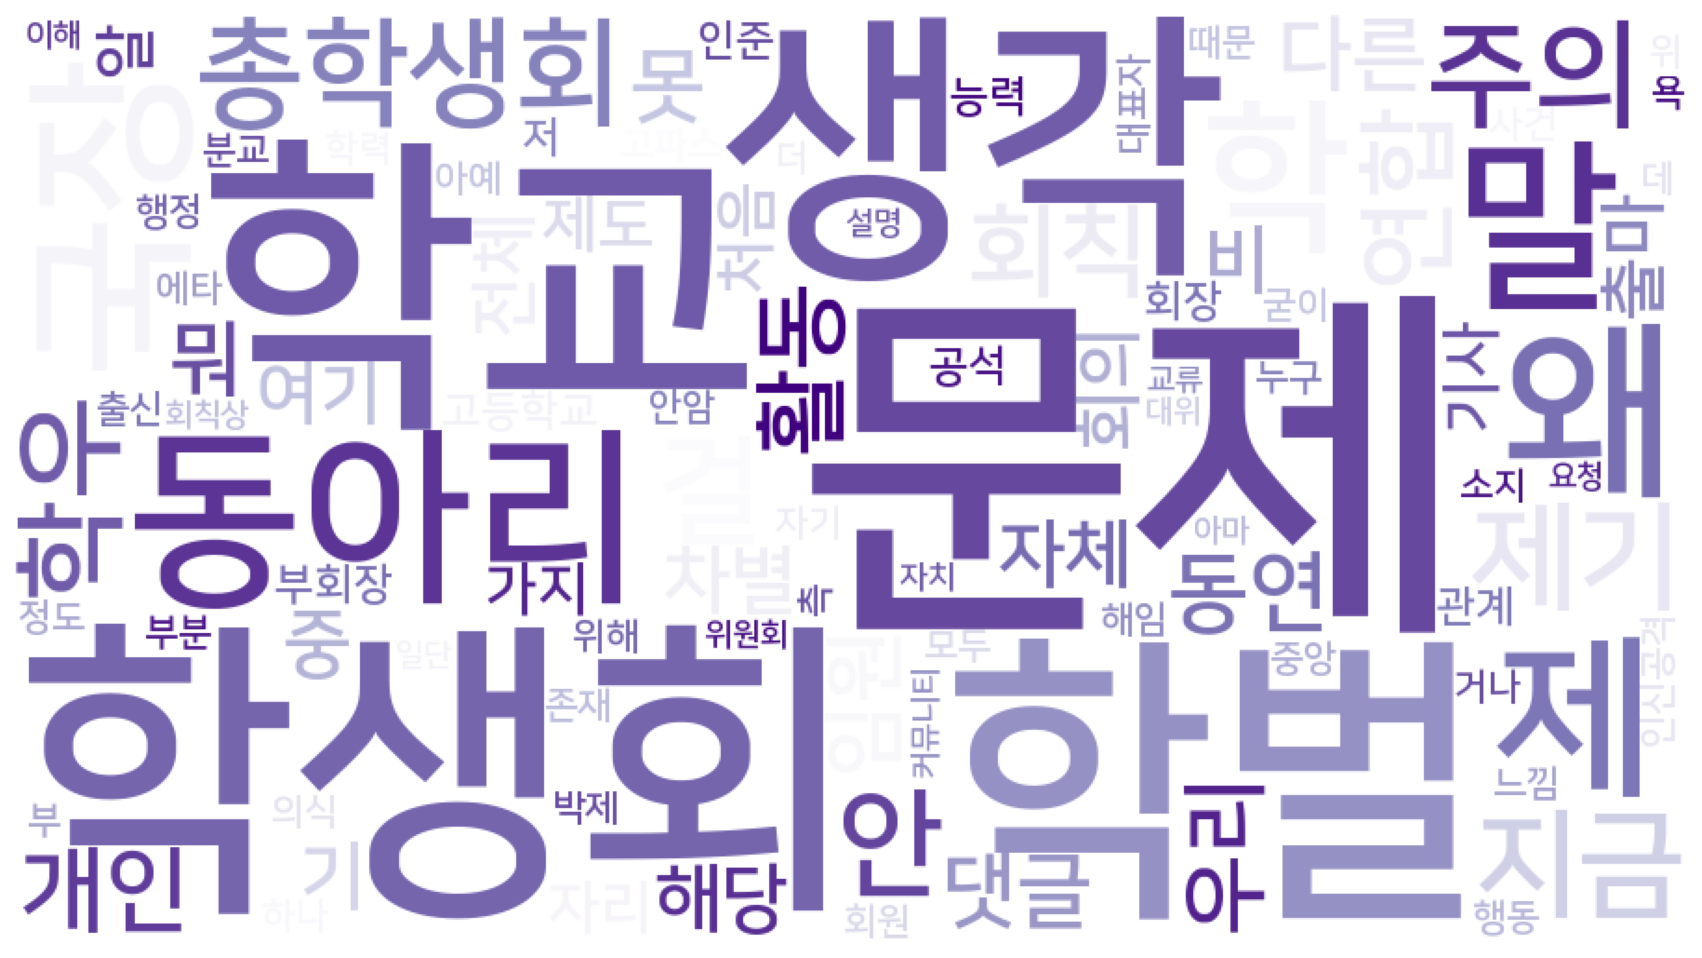

In [ ]:
wcdraw(kor_2, 'Purples')

### 2. 카테고리별 빈도수 그래프

In [ ]:
# konlpy로 명사만 추출하는 토큰화를 진행
stopwords = ['않다','에서','있다','없다','그렇다','아니다','것','이다','의','가','이','은','들', '주',
             '는','좀','잘','걍','과','도','을','를','으로','자','에','와','한','하다','휴','수' ,'일',
             '전','등','두','명','고','며','아아','대해','고려대','씨','뿐','박','감','살','관','그','내','의'
             ,'거','요''조','장관','조국','후보자','회','때','캠','세종','세종캠','캠퍼스','학생','대한','박성민',
             '비서','비서관','청년','그','청와대','사람','당신','게','시','세','건','글','분','서울','요','조',
             '조씨','비','학','왜','말','제','걸']

okt = Okt()
token = []
for sentence in kor_1['content_preprocess']:
    temp_X = []
    temp_X = okt.nouns(str(sentence)) # 명사 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    token.append(temp_X)
kor_1['token'] = token
tokenizer = Tokenizer()
tokenizer.fit_on_texts(token)

In [ ]:
from collections import Counter 

words = np.hstack(kor_1['token'].values)
word_count = Counter(words)
input = dict(word_count.most_common(10))
news_1_df = pd.DataFrame(list(input.items()),
                   columns=['keyword', 'frequency'])
news_1_df.head(10)

,keyword,frequency
0,검찰,23
1,집회,22
2,개혁,16
3,대통령,16
4,학교,12
5,상식,12
6,비정상,12
7,정의,11
8,우리,11
9,총장,10


In [ ]:
# 한글 폰트 꺠지는 경우에 셀 실행 후 런타임 다시 시작
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

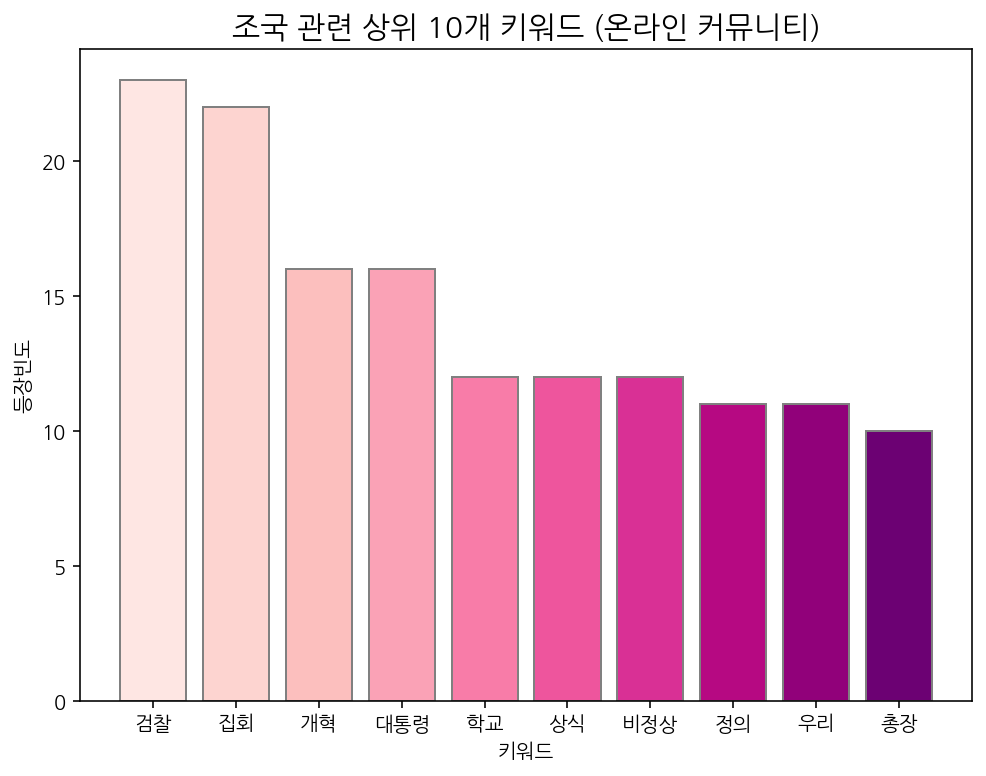

In [ ]:
import seaborn as sns
c = sns.color_palette('RdPu', len(news_1_df['keyword']))

plt.figure(figsize=(8,6))
plt.bar(news_1_df['keyword'], news_1_df['frequency'], color = c, edgecolor = 'grey')
plt.xlabel('키워드')
plt.ylabel('등장빈도')
plt.title('조국 관련 상위 10개 키워드 (온라인 커뮤니티)', size=15)
plt.show()